## Stat4ACSAI / Homework 02
## Pierpaolo Brutti
## Due Thursday, April 14 (on Moodle)

### Exercise 01 | Deja vu

For $\theta > 0$, let $\{X_1,\ldots,X_n\}$ be IID from the following parametric *density*:

$$
f(x\,|\,\theta) = \frac{\theta^2}{x^3} \cdot \mathrm{e}^{-\tfrac{\theta}{x}}  \quad \text{for} \quad x \geqslant 0, 
$$

having mean $\mathbb{E}(X) = \frac{\theta}{2}$ and variance $\mathbb{V}\text{ar}(X) = \frac{\theta^2}{4}$.

### To Do

1. Find the maximum likelihood *estimator* for $\theta$ and then evaluate the maximum likelihood *estimate* on the `Wind` variable of the `airquality` dataset we used in class. <br>
 Is it a good fit? Briefly explain your answer by looking at some basic plots and stats.
 
2. Use the properties and asymptotics of MLE to get an estimate of the *average* wind speed together with a quatification of the estimator standard error.

3. Compare the previous result with what a **Nonparametric** Bootstrap solution for the same population parameter (i.e. the population mean).

4. [`Bonus`] Are you also able to implement (and compare) a **Parametric** Bootstrap solution for the sample problem? Explain.

### Exercise 02 | Toy portfolio

Suppose that we have two random variables $X$ and $Y$ which represent the yields of two financial assets. 

We will invest a fraction of our money, say $\omega$, in $X$ and the remaining fraction $(1 - \omega)$ in $Y$.

Our yield will hence be
$$
\omega \cdot X + (1 - \omega) \cdot Y.
$$
Because this is a random quantity, we may want to choose $\omega$ to minimize the variance of our investment. <br>
One can show that the value of $\omega$ minimizing
$$
\mathbb{V}\text{ar}\big( \omega \cdot X + (1 - \omega) \cdot Y \big),
$$
is indeed
\begin{equation}\label{eq:opt}
\omega^\star = \frac{\sigma^2_Y - \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2\cdot \sigma_{X,Y}},
\end{equation}
where $\sigma^2_X = \mathbb{V}\text{ar}(X)$, $\sigma^2_Y = \mathbb{V}\text{ar}(Y)$, $\sigma_{X,Y} = \mathbb{C}\text{ov}(X,Y)$.

Given a random sample $\big\{ (X_1,Y_1), \ldots, (X_n,Y_n)\big\}$ for the returns, we can compute the following plug-in estimator for $\omega^\star$
$$
\widehat{\omega} = \frac{ \widehat{\sigma}^2_Y - \widehat{\sigma}_{X,Y}}{\widehat{\sigma}^2_X + \widehat{\sigma}^2_Y - 2\cdot \widehat{\sigma}_{X,Y}},
$$
Note that even if we knew a parametric form (say bivariate normal) for the joint distribution of $X$ and $Y$, performing formal calculations involving $\widehat{\omega}$ would be difficult, because of the presence of sample estimates (sample variances and covariance) in its numerator and denominator.

As you can imagine, we can pull financial data into `Python` in many different ways
To get the stocks info you have to know (in advance) the symbol associated to that stock (e.g. `Apple Inc.`, `IBM`, etc.) in a particular market (e.g. `NYSE`, `NASDAQ`). You can easily obtain this from portals like [Yahoo! Finance](https://it.finance.yahoo.com/). For example try something like:

In [4]:
# url: https://pypi.org/project/fix-yahoo-finance/

# Install
# pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [11]:
df = yf.download("IBM MSFT AAPL", start="2019-01-01", end="2020-01-01", group_by="ticker") 
df.head() 

[*********************100%***********************]  3 of 3 completed


MSFT                                                 \
                  Open        High         Low       Close  Adj Close   
Date                                                                    
2018-12-31  101.290001  102.400002  100.440002  101.570000  98.014908   
2019-01-02   99.550003  101.750000   98.940002  101.120003  97.580658   
2019-01-03  100.099998  100.190002   97.199997   97.400002  93.990868   
2019-01-04   99.720001  102.510002   98.930000  101.930000  98.362305   
2019-01-07  101.639999  103.269997  100.980003  102.059998  98.487755   

                           AAPL                                              \
              Volume       Open       High        Low      Close  Adj Close   
Date                                                                          
2018-12-31  33173800  39.632500  39.840000  39.119999  39.435001  38.233894   
2019-01-02  35329300  38.722500  39.712502  38.557499  39.480000  38.277527   
2019-01-03  42579100  35.994999  36.430000  35.500000  35.547501  34.464798   
2019-01-04  44060600  36.132500  37.137501  35.950001  37.064999  35.936077   
2019-01-07  35656100  37.174999  37.207500  36.474998  36.982498  35.856087   

                              IBM                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2018-12-31  140014000  108.346077  109.321220  107.476097  108.671127   
2019-01-02  148158800  107.084129  110.879539  106.778206  110.143402   
2019-01-03  365248800  109.493309  109.827919  107.734222  107.944550   
2019-01-04  234428400  109.856598  112.323135  109.407265  112.160614   
2019-01-07  219111200  112.332695  113.604210  111.539200  112.954109   

                                
            Adj Close   Volume  
Date                            
2018-12-31  92.121361  5212009  
2019-01-02  93.369423  4434935  
2019-01-03  91.505432  4546648  
2019-01-04  95.079422  4683779  
2019-01-07  95.752068  3923755

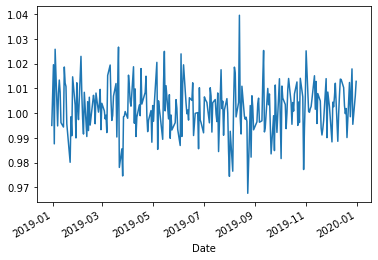

In [12]:
# Build some relative performance measure like the ratio Close/Open
AP_ret = df.AAPL.Close/df.AAPL.Open

# Take a look
AP_ret.plot();

### To Do

1. Prove (analytically) that $\omega^\star$ in fact minimizes the volatility of your investment.

2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.